In [1]:
from __future__ import print_function, division
from collections import Counter
import os
import time
import json
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")

src = "data"

In [ ]:
t0 = time.clock()
df = pd.read_csv(os.path.join(src, "format1", "user_log_format1.csv")
print('load data\nruntime:', time.clock() - t0)

In [2]:
t0 = time.clock()
crosstab_by_user_item_action = pd.crosstab([df.user_id, df.item_id], df.action_type)
print('runtime:', time.clock() - t0)

load data
runtime: 62.741606355


In [ ]:
import logistic_regression


x = np.array(crosstab_by_user_item_action.loc[:, [0, 1, 3]])
y = np.array(crosstab_by_user_item_action[2])
logistic_fit = logistic_regression.fit(x, y)

In [ ]:
crosstab_by_user_item_action.to_csv('result.csv')

In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
x = []
y = []
for d in data:
    x += [[d[0], d[1], d[3]]]
    y += [[1 if d[2]>0 else 0]]

lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[[ 0.41630516 -1.28066333 -0.12869946]]
[-2.86266305]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[144,   0,   1],
       [111,   0,   0],
       [215,   0,   0],
       [173,   0,   0],
       [173,   0,   0]])

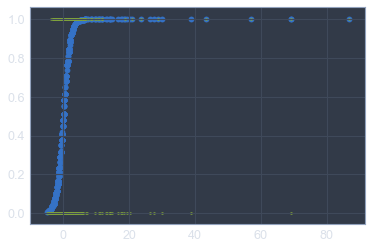

In [100]:
nx = np.array(x)
ny = np.array(y)

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

nx_1 = np.concatenate((np.ones((nx.shape[0], 1)), nx), axis=1)
w = np.array([lr.intercept_[0]] + [wi for wi in lr.coef_[0]])

t = nx_1.dot(w)
p = sigmoid(t)

plt.scatter(t, p)
plt.scatter(t, ny, s=6)
# plt.axis([-10, 10, -.1, 1.1])
np.where(t>40)
nx[np.where(t>40)]

roc_auc_score:  0.5446580323779875
roc_auc_score:  0.5446580323779875


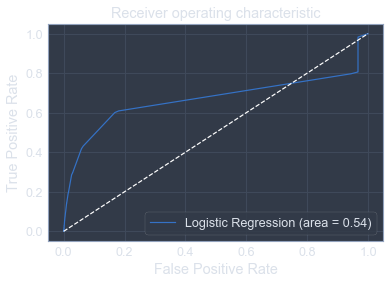

In [90]:
y_hat = lr.predict(nx)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
print("roc_auc_score: ", roc_auc_score(ny, y_hat))
print("roc_auc_score: ", roc_auc_score(ny, lr.predict(nx)))

pred_prob = sigmoid(t) 

# fpr0, tpr0, thresholds0 = roc_curve(ny, pred_prob)
fpr1, tpr1, thresholds1 = roc_curve(ny, lr.predict_proba(nx)[:,1])

def roc_graph(fpr=fpr1, tpr=tpr1):
#     fig = plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y, y_hat))
    plt.plot([0, 1], [0, 1],'w--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
#     plt.savefig('Log_ROC')
    plt.show()
#     return fig

roc_graph()